## 0. python imports

In [90]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t
from scipy.stats import norm
from scipy.stats import ttest_1samp

%matplotlib inline

## 1. data loading / generation

t student distribution:
* resilient to small samples
* available when standard deviation is unknown

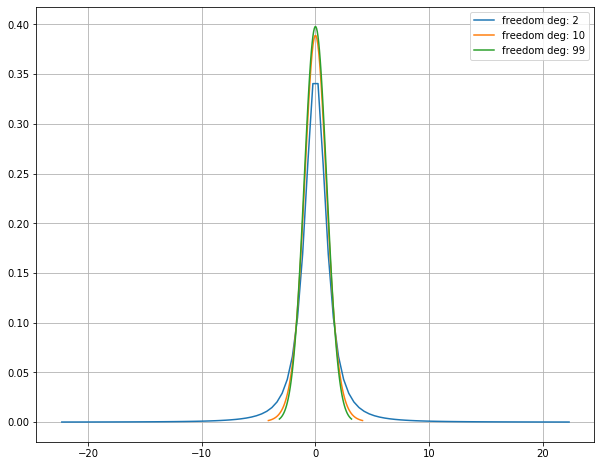

In [85]:
df = [2, 10, 99]
plt.figure(figsize=(10, 8))
for d in df:
    rv = t(df=d, loc=0, scale=1) # random variable
    x = np.linspace(rv.ppf(0.001), rv.ppf(0.999), 100)
    y = rv.pdf(x)
    plt.plot(x, y, label=f'freedom deg: {d}')
plt.legend()
plt.grid()
plt.show()

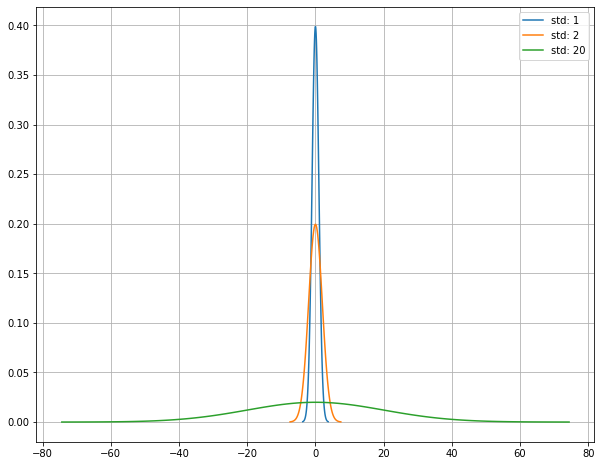

In [68]:
sc = [1, 2, 20]
plt.figure(figsize=(10, 8))
for s in sc:
    rv = norm(scale=s, loc=0) # random variable
    x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
    y = rv.pdf(x)
    plt.plot(x, y, label=f'std: {s}')
plt.legend()
plt.grid()
plt.show()

### 2. hypothesis test example (handmade)

* explain concept of degrees of freedom in statistics
* hat example
* mean example

In [70]:
mu = 5.7
mu_hat = 5.1
std_hat = 1.6
n = 100

* 100 subjects
* average is known, 99 degrees of freedom
* t student

In [88]:
t_test = (mu_hat - mu) / (std_hat / np.sqrt(n))
t_test

-3.750000000000003

In [89]:
rv = t(df=99)
p_value = rv.pdf(t_test)
p_value

0.0005195698013766717

probability of `mu_hat` being less than 5.7 by chance is 0.0005, much less than 0.05, so null hypothesis is rejected.

## 3. hypothesis test example (scipy)

In [102]:
patients = np.random.normal(5.1, 1.6, 100)
ttest_1samp(patients, 5.7)

Ttest_1sampResult(statistic=-5.879664046529704, pvalue=5.575047514235572e-08)